<a href="https://colab.research.google.com/github/gulabpatel/Graph_Neural_Network/blob/main/01.1%3A%20Data_Handling_PyGeometric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Video walkthrough the code : https://www.youtube.com/watch?v=Vz5bT8Xw6Dc

Study material : https://antoniolonga.github.io/Pytorch_geometric_tutorials/

In [ ]:
# Install required packages.
!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-1.9.0+cu102.html
!pip install -q torch-geometric

In [ ]:
import numpy as np
import torch
import torch_geometric.datasets as datasets
import torch_geometric.data as data
import torch_geometric.transforms as transforms
import networkx as nx
from torch_geometric.utils.convert import to_networkx

## Data Handling in PyG

### Data

Let's create a dummy graph

In [ ]:
embeddings = torch.rand((100, 16), dtype=torch.float)
embeddings

tensor([[0.7164, 0.5717, 0.5573,  ..., 0.9746, 0.6614, 0.1257],
        [0.8107, 0.7000, 0.8942,  ..., 0.2740, 0.6668, 0.3369],
        [0.1989, 0.3543, 0.9281,  ..., 0.5350, 0.5927, 0.7393],
        ...,
        [0.6772, 0.7521, 0.9974,  ..., 0.2159, 0.1848, 0.2425],
        [0.1782, 0.3699, 0.4818,  ..., 0.5892, 0.7048, 0.2142],
        [0.5355, 0.4125, 0.2074,  ..., 0.5320, 0.8348, 0.3541]])

In [ ]:
rows = np.random.choice(100, 500)
#print(rows.size)
cols = np.random.choice(100, 500)
#print(cols)
edges = torch.tensor([rows, cols])
print(edges)

tensor([[62, 60, 25, 99,  5, 70, 47, 24, 24, 76, 33, 92, 25, 15, 45, 12, 80, 67,
          1, 89, 76, 24,  7, 48, 34, 39, 52, 42, 26, 39, 12, 90, 87, 96, 88, 84,
         46,  9, 35, 63, 79, 16, 65, 34, 14, 11, 17,  3, 70, 20, 98, 37, 65, 85,
         15, 15, 97, 56, 70, 12, 33, 14, 35, 52, 36, 23,  0,  3, 48, 56, 69, 32,
         32, 25, 54, 73, 83, 90,  9, 33, 25, 72, 37, 16, 57, 24,  9, 46, 31, 44,
         55, 26, 33, 88, 75, 48, 54, 47, 41, 69, 78, 52,  1, 52, 57, 26, 83, 18,
         61, 12, 32, 40, 31, 39, 83, 51, 32, 65, 94, 73,  4, 93, 87, 66,  2,  8,
         98, 87, 58, 25, 46, 10, 98, 45, 71, 77,  0, 91, 89, 37, 26, 79, 44, 81,
         75, 59, 97, 44, 41, 98, 37, 53, 39, 89, 19, 92, 42, 28,  6, 58, 84, 28,
         51, 76, 78,  3, 95, 94,  9, 43, 17, 68, 43, 14, 39, 99, 99, 67, 96,  3,
         26, 60, 20,  4,  9, 20, 15, 90, 73, 65, 21, 23, 10, 21, 33, 58, 23, 82,
         89, 39, 94, 40, 51, 67, 38, 73, 78, 58, 17, 59, 66, 74,  6, 38, 12, 46,
         88,  3, 51, 97, 18,

In [ ]:
edges_attr = np.random.choice(3,500)
edges_attr

array([1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1,
       0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 1, 2,

In [ ]:
ys = torch.rand((100)).round().long()
ys

tensor([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])

Convert the graph information into a PyG Data object

In [ ]:
graph = data.Data(x=embeddings, edge_index=edges, edge_attr=edges_attr, y=ys)

In [ ]:
graph

Data(edge_attr=[1 1 2 2 1 1 1 2 1 2 0 2 0 1 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 0 2 1 0 0 0 2
 2 2 2 0 0 2 1 0 1 0 2 2 0 1 2 1 0 2 1 0 2 0 2 2 0 2 0 1 0 1 1 0 2 2 1 1 0
 1 2 1 2 2 1 2 2 2 2 0 0 2 0 0 1 2 0 1 1 0 2 2 0 1 1 0 0 0 2 1 2 0 0 1 0 2
 1 0 1 1 1 0 1 1 1 2 0 2 1 0 0 0 0 2 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 2 2
 1 1 2 1 2 1 2 2 2 0 1 1 1 1 0 0 1 0 2 2 1 2 1 2 2 1 0 2 1 2 2 1 1 1 0 1 1
 2 2 0 1 2 1 2 1 1 0 2 0 0 1 2 0 2 0 2 0 1 1 0 2 1 2 1 0 0 0 2 1 2 2 2 0 1
 0 2 2 2 0 2 1 0 2 1 1 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2 0 0 1 0 2 2 0 1 1 0 0
 0 0 2 1 0 2 2 1 2 0 1 0 1 0 2 2 2 2 1 2 1 2 2 2 2 2 0 0 2 2 1 2 0 0 2 0 2
 1 1 0 1 2 0 1 0 1 0 0 1 2 1 2 1 1 1 2 1 0 2 2 0 1 0 0 0 0 1 2 1 1 2 1 2 0
 0 2 1 0 0 2 2 2 1 1 1 0 2 0 1 1 2 0 1 2 2 1 2 0 1 0 0 2 2 0 2 0 2 1 2 2 0
 2 2 0 1 2 1 2 1 2 1 2 1 0 1 1 0 1 2 1 1 2 0 0 0 0 0 0 0 2 1 0 2 1 1 0 1 0
 2 0 1 1 1 2 2 0 2 1 0 0 0 1 1 0 1 1 2 1 2 0 0 1 0 0 0 1 2 1 2 2 1 2 1 0 1
 1 0 2 1 0 2 2 1 2 0 2 0 1 1 1 2 2 2 2 1 0 2 2 0 2 1 1 1 1 0 0 2 2 2 2 2 1
 0 0 2 1 0

Let's visualize the information contained in the data object

In [ ]:
for prop in graph:
    print(prop)

('edge_attr', array([1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1,
       0, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0,
       1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2,
       1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 0,
       1, 2, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 2, 2, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 0, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 

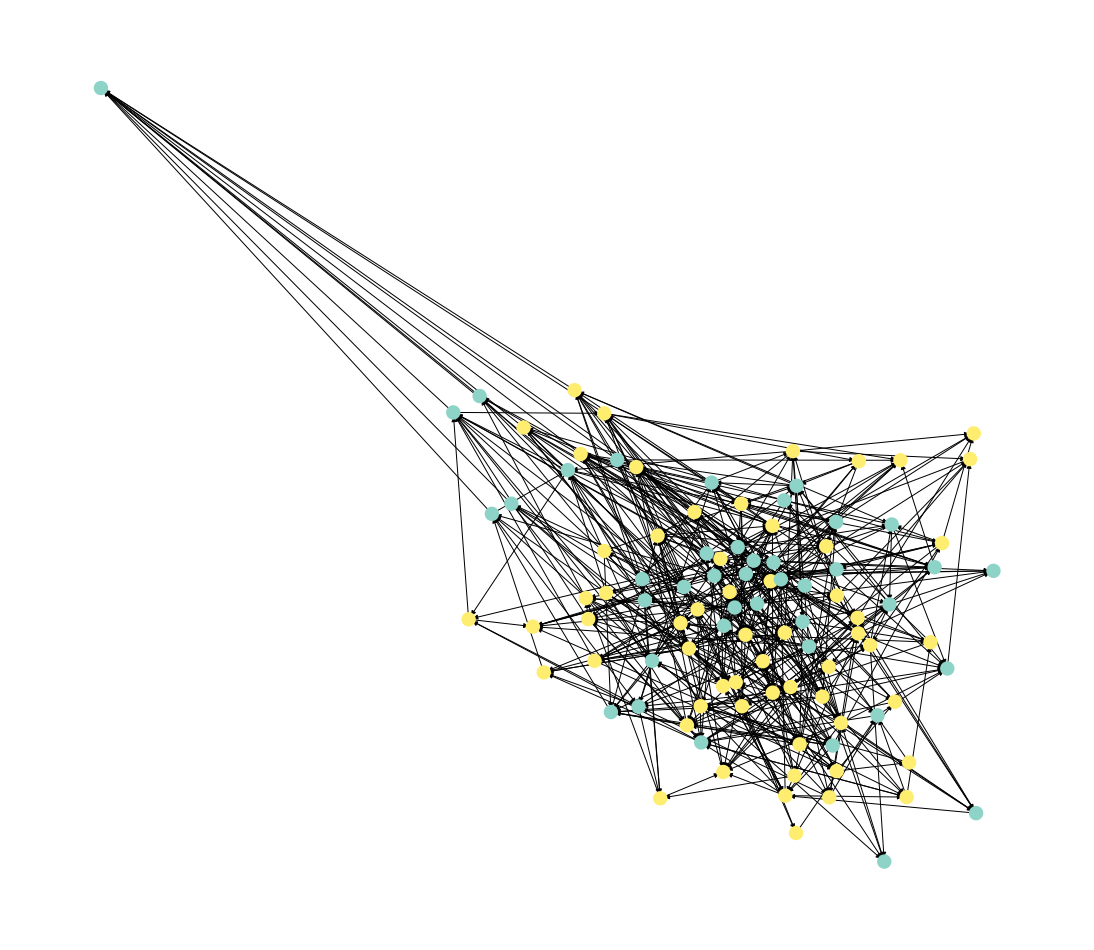

In [ ]:
vis = to_networkx(graph)

node_labels = graph.y.numpy()

import matplotlib.pyplot as plt
plt.figure(1,figsize=(15,13)) 
nx.draw(vis, cmap=plt.get_cmap('Set3'),node_color = node_labels,node_size=70,linewidths=6)
plt.show()

### Batch

With the Batch object we can represent multiple graphs as a single disconnected graph

In [ ]:
graph2 = graph

In [ ]:
batch = data.Batch().from_data_list([graph, graph2])

In [ ]:
print("Number of graphs:",batch.num_graphs)
print("Graph at index 1:",batch[1])
print("Retrieve the list of graphs:\n",len(batch.to_data_list()))

Number of graphs: 2
Graph at index 1: Data(edge_attr=[1 1 2 2 1 1 1 2 1 2 0 2 0 1 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 0 2 1 0 0 0 2
 2 2 2 0 0 2 1 0 1 0 2 2 0 1 2 1 0 2 1 0 2 0 2 2 0 2 0 1 0 1 1 0 2 2 1 1 0
 1 2 1 2 2 1 2 2 2 2 0 0 2 0 0 1 2 0 1 1 0 2 2 0 1 1 0 0 0 2 1 2 0 0 1 0 2
 1 0 1 1 1 0 1 1 1 2 0 2 1 0 0 0 0 2 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 2 2
 1 1 2 1 2 1 2 2 2 0 1 1 1 1 0 0 1 0 2 2 1 2 1 2 2 1 0 2 1 2 2 1 1 1 0 1 1
 2 2 0 1 2 1 2 1 1 0 2 0 0 1 2 0 2 0 2 0 1 1 0 2 1 2 1 0 0 0 2 1 2 2 2 0 1
 0 2 2 2 0 2 1 0 2 1 1 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2 0 0 1 0 2 2 0 1 1 0 0
 0 0 2 1 0 2 2 1 2 0 1 0 1 0 2 2 2 2 1 2 1 2 2 2 2 2 0 0 2 2 1 2 0 0 2 0 2
 1 1 0 1 2 0 1 0 1 0 0 1 2 1 2 1 1 1 2 1 0 2 2 0 1 0 0 0 0 1 2 1 1 2 1 2 0
 0 2 1 0 0 2 2 2 1 1 1 0 2 0 1 1 2 0 1 2 2 1 2 0 1 0 0 2 2 0 2 0 2 1 2 2 0
 2 2 0 1 2 1 2 1 2 1 2 1 0 1 1 0 1 2 1 1 2 0 0 0 0 0 0 0 2 1 0 2 1 1 0 1 0
 2 0 1 1 1 2 2 0 2 1 0 0 0 1 1 0 1 1 2 1 2 0 0 1 0 0 0 1 2 1 2 2 1 2 1 0 1
 1 0 2 1 0 2 2 1 2 0 2 0 1 1 1 2 2 2 2 1 0 2 2 

### Cluster

ClusterData groups the nodes of a graph into a specific number of cluster for faster computation in large graphs, then use ClusterLoader to load batches of clusters

In [ ]:
# cluster = data.ClusterData(graph, 5)
# cluster

In [ ]:
# clusterloader = data.ClusterLoader(cluster)
# clusterloader

### Sampler

For each convolutional layer, sample a maximum of nodes from each neighborhood (as in GraphSAGE)

In [ ]:
sampler = data.NeighborSampler(graph.edge_index, sizes=[3,10], batch_size=4,
                                  shuffle=False)

In [ ]:
sampler

NeighborSampler(sizes=[3, 10])

In [ ]:
for s in sampler:
    print(s)
    #break

(4, tensor([ 0,  1,  2,  3, 65, 76, 15, 59, 14, 89, 32, 75,  6, 10, 88, 70, 35, 43,
        90, 78, 37, 73, 44, 94, 54, 53, 64, 18, 34, 26, 33, 83, 71, 62, 41, 45,
        42,  4, 46, 24, 39, 56, 52,  8, 19, 25, 87, 55, 49, 60]), [EdgeIndex(edge_index=tensor([[ 4,  5,  6, 10, 10, 14, 15, 16, 17,  2,  3,  4,  7,  8, 18, 19, 20,  3,
          6,  7,  9, 10, 16, 21, 22, 11, 12, 13, 22, 12, 17, 21, 23, 24, 25, 26,
         27,  9, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,  3, 38, 39, 21, 40,
          0,  4,  4, 34, 35, 41, 42, 43, 44, 45,  3, 46, 47, 48, 12, 16, 26, 28,
         49],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
          2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  5,
          5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,  9,  9,  9, 10, 10,
         11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13,
         13]]), e_id=tensor([189,  20, 295, 316, 110, 216,  48,  38, 172, 338, 324, 35

In [ ]:
print("Batch size:", s[0])
print("Number of unique nodes involved in the sampling:",len(s[1]))
print("Number of neighbors sampled:", len(s[2][0].edge_index[0]), len(s[2][1].edge_index[0]))

Batch size: 4
Number of unique nodes involved in the sampling: 45
Number of neighbors sampled: 64 10


### Datasets

List all the available datasets

In [ ]:
datasets.__all__

['KarateClub',
 'TUDataset',
 'GNNBenchmarkDataset',
 'Planetoid',
 'NELL',
 'CitationFull',
 'CoraFull',
 'Coauthor',
 'Amazon',
 'PPI',
 'Reddit',
 'Reddit2',
 'Flickr',
 'Yelp',
 'AmazonProducts',
 'QM7b',
 'QM9',
 'ZINC',
 'MoleculeNet',
 'Entities',
 'GEDDataset',
 'MNISTSuperpixels',
 'FAUST',
 'DynamicFAUST',
 'ShapeNet',
 'ModelNet',
 'CoMA',
 'SHREC2016',
 'TOSCA',
 'PCPNetDataset',
 'S3DIS',
 'GeometricShapes',
 'BitcoinOTC',
 'ICEWS18',
 'GDELT',
 'DBP15K',
 'WILLOWObjectClass',
 'PascalVOCKeypoints',
 'PascalPF',
 'SNAPDataset',
 'SuiteSparseMatrixCollection',
 'TrackMLParticleTrackingDataset',
 'AMiner',
 'WordNet18',
 'WordNet18RR',
 'WikiCS',
 'WebKB',
 'WikipediaNetwork',
 'Actor',
 'JODIEDataset',
 'MixHopSyntheticDataset',
 'UPFD',
 'GitHub',
 'FacebookPagePage',
 'LastFMAsia',
 'DeezerEurope',
 'GemsecDeezer',
 'Twitch']

In [ ]:
name = 'Cora'
transform = transforms.Compose([
    transforms.AddTrainValTestMask('train_rest', num_val=500, num_test=500),
    transforms.TargetIndegree(),
])
cora = datasets.Planetoid('./data', name, pre_transform=transforms.NormalizeFeatures(), transform=transform)

Processing...
Done!


In [ ]:
aids = datasets.TUDataset(root="./data", name="AIDS")

Extracting data/AIDS/AIDS.zip
Processing...
Done!


In [ ]:
print("AIDS info:")
print('# of graphs:', len(aids))
print('# Classes (graphs)', aids.num_classes)
print('# Edge features', aids.num_edge_features)
print('# Edge labels', aids.num_edge_labels)
print('# Node features', aids.num_node_features)

AIDS info:
# of graphs: 2000
# Classes (graphs) 2
# Edge features 3
# Edge labels 3
# Node features 38


In [ ]:
print("Cora info:")
print('# of graphs:', len(cora))
print('# Classes (nodes)', cora.num_classes)
print('# Edge features', cora.num_edge_features)
print('# Node features', cora.num_node_features)

Cora info:
# of graphs: 1
# Classes (nodes) 7
# Edge features 1
# Node features 1433


In [ ]:
aids.data

Data(edge_attr=[64780, 3], edge_index=[2, 64780], x=[31385, 38], y=[2000])

In [ ]:
aids[0]

Data(edge_attr=[106, 3], edge_index=[2, 106], x=[47, 38], y=[1])

In [ ]:
cora.data

Data(edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [ ]:
cora[0]

Data(edge_attr=[10556, 1], edge_index=[2, 10556], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])

In [ ]:
cora_loader = data.DataLoader(cora)

In [ ]:
for l in cora_loader:
    print(l)
    break

Batch(batch=[2708], edge_attr=[10556, 1], edge_index=[2, 10556], ptr=[2], test_mask=[2708], train_mask=[2708], val_mask=[2708], x=[2708, 1433], y=[2708])
